# Medidas de dispersión

### Rango:

El Rango es el intervalo entre el valor máximo y el valor mínimo.

### Cuartiles
Los cuartiles separan los datos en 4 partes iguales

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales

- 1er cuartil (Q1): 25% de los datos es menor que o igual a este valor.
- 2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.
- 3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.
- Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

### Diagrama de caja o box plot

representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

### Dataset

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

## Desviación estándar

Media

$$
\mu = \frac {1}{n} \sum \limits_{i=1}^n a_i
$$

Formula

$$
\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}
$$

Un error común es comparar la desviación estándar de dos variables que tienen escalas diferentes, en este ejemplo usaremos el edad y altura

edad cumplida
media = 24, desviación estándar = 2.5

altura en centimentros
media = 175, desviación estándar = 8

Como vemos la desviación estándar de altura es mayor dado a su escala.

Lo correcto sería usar el coeficiente de variabilidad que es simplemente dividir la desviación estandar entre la media.

edad
2.5 / 24 = 0.1042.

altura
8 / 175 = 0.0457

Ahora ambas variables la podemos compara y concluimos que edad tiene una mayor variabilidad

Cuadrantes en una distribucion normal

![cuadrantes](./images/cuadrantes.png)

Desviacion estandar

![desviacion estandar](./images/desviacion_estandar.webp)

## Desviación estándar

Dado un dataset de precio de autos

La media es el valor promedio

Media

$$
\mu = \frac {1}{n} \sum \limits_{i=1}^n a_i
$$

Una medida de dispersión muy util se obtiene de calcular la variación de cada punto y calcular la distancia que tiene ese punto del valor promedio.

La distancia puede ser negativa si el valor es menor que el promedio y positiva si es mayor que el promedio.

Ya que las distancias son positivas o negativas los valores se elevan al cuadrado antes de sumarse para que siempre sea un valor positivo

Formula de la desviación estándar

$$
\sigma={\sqrt {\frac {\sum_{n-1}^n(x_{i}-{\mu})^{2}}{N}}}
$$

Considerar también que $\sigma^2$ es la varianza

cuando se trabaja con una muestra de los datos y no con toda la población se realiza una corrección en la formula al dividir entre $n-1$

$$
\sigma={\sqrt {\frac {\sum_{n-1}^n(x_{i}-{\mu})^{2}}{n-1}}}
$$

Una distribución normal tiene la forma de una campana de Gauss. Es simétrica, la media, moda y mediana están en la misma posición.

también que un conjunto de datos normal la distancia entre $\mu -3\sigma$ y $\mu + 3\sigma$ contempla la totalidad de los datos o aproximadamente el 99.72% de los datos.

![desviacion estandar](./images/desviacion_estandar.webp)

**Metodo de detección de Outliers con el Rango Intercuartil**
Metodo para descartar datos Outliers consiste en considerar el valor mínimo y máximo de la siguiente manera:

$min = Q1 - 1.5*IQR$

$max = Q3 + 1.5*IQR$

Siendo el rango intercuartil (IQR) la distancia entre Q1 y Q3.

además, este método de detección de Outliers con el Rango Intercuartil se aproximó así que tomaremos los datos en base a $3\sigma$

**Distribucion No Simétrica**
En este caso usar el rango intercuartil igual que antes no es posible, lo que se hace es en lugar de multiplicar por el IQR, se busca una función que dependa del IQR.

$min = Q1 - 1.5*f(IQR)$

$max = Q3 + 1.5*g(IQR)$

además, si la distribución es No simétrica usar la desviación estándar para contemplar la mayoría de los datos ya no es válido, por lo cual el método que debemos aplicar es el uso del rango Intercuartil.


Metodo de deteccion de Outliers utilizando en el Rango Inter Cuartil (IQR) en **una distribucion normal**

min = Q1 - 1.5*IQR

max = Q3 + 1.5*IQR

Si la distribucion **no es normal**

min = Q1 - 1.5 * f(IQR)

max = Q3 + 1.5 * f(IQR)


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [ ]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [ ]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [ ]:
# Quartiles
median = df['price_usd'].median()
print(f'Media: {median}')
Q1 = df['price_usd'].quantile(q=0.25)
print(f'Q1: {Q1}')
Q3 = df['price_usd'].quantile(q=0.75)
print(f'Q3: {Q3}')

# Los cuartiles y percentiles son casos especificos de uso del Quantil

min_val = df['price_usd'].quantile(q=0)
print(f'Valor minimo: {min_val}')

max_val = df['price_usd'].quantile(q=1.0)
print(f'Valor maximo: {max_val}')

Media: 4800.0
Q1: 2100.0
Q3: 8990.0
Valor minimo: 1.0
Valor maximo: 50000.0


In [ ]:
iqr = Q3 - Q1
 
print(f"Rango Intercuartil: {iqr}")

Rango Intercuartil: 6890.0


### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [ ]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

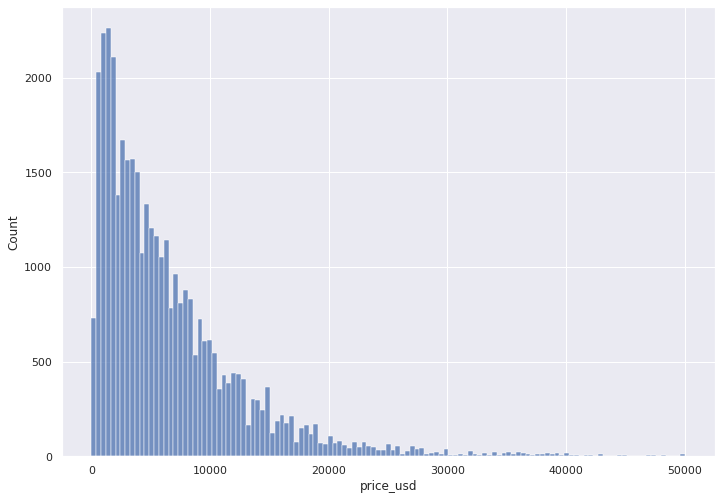

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_usd'>

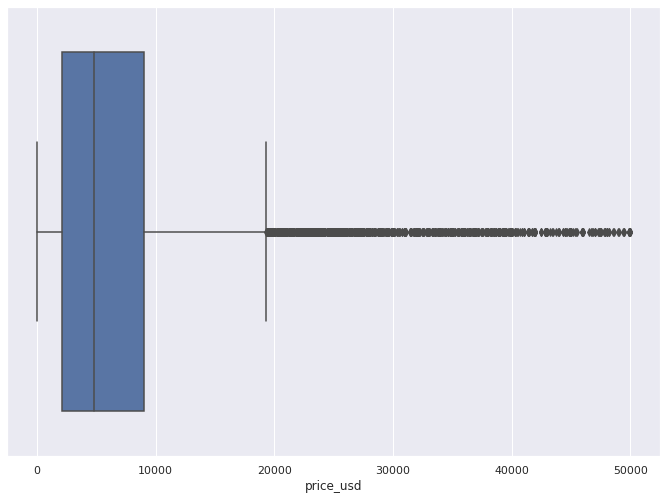

In [ ]:
sns.boxplot(df['price_usd'])

como podemos ver en la grafica la distribucion de datos esta sesgada

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

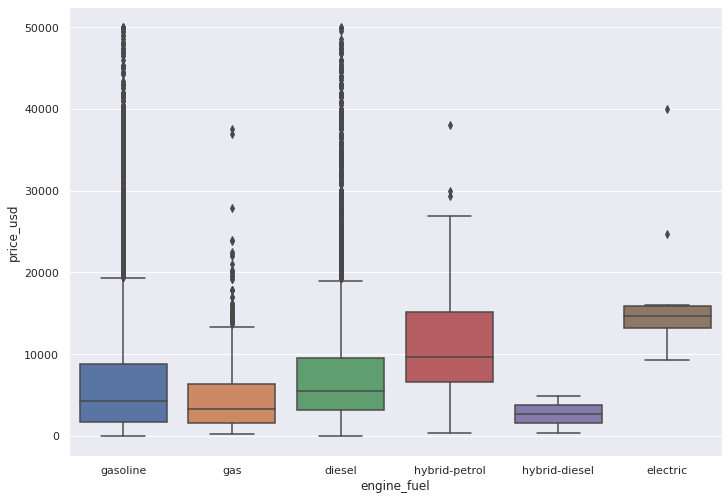

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'engine_fuel', y= 'price_usd', data=df)

<AxesSubplot:xlabel='price_usd', ylabel='engine_fuel'>

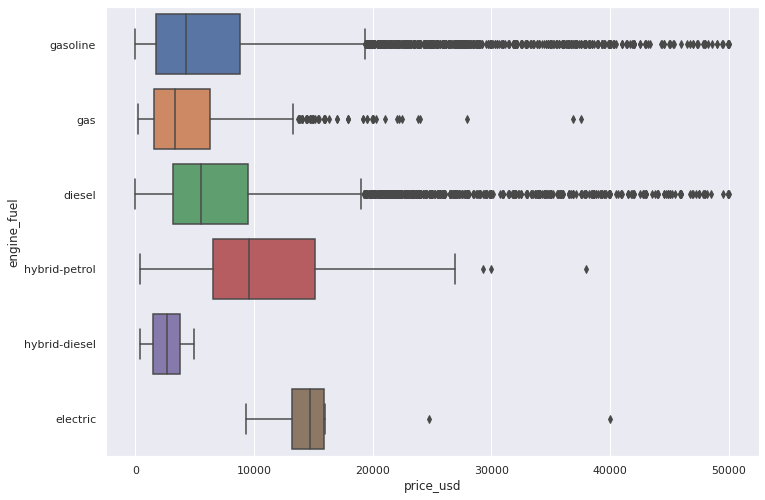

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'price_usd', y= 'engine_fuel', data=df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

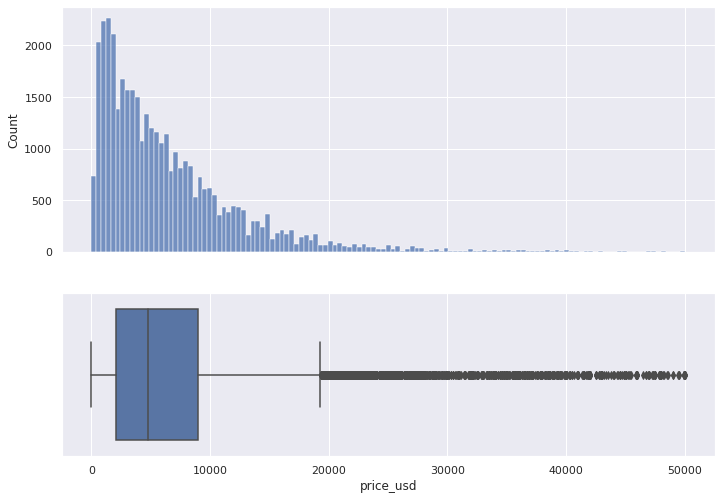

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

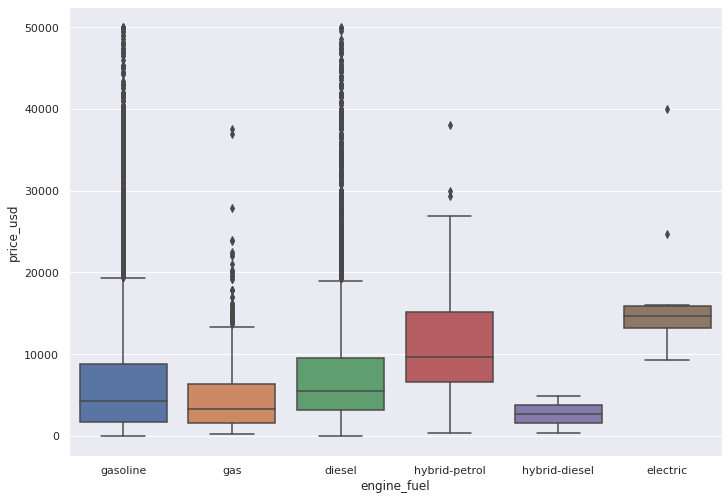

In [ ]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)

## Asimetría en distribuciones
Como vimos en la clase, el hecho de que nuestra distribución tenga una tendencia a la derecha o a izquierda nos representa un problema, ya que no a acorde con una distribución y eso puede afectar a nuestros análisis si no tomamos en cuenta ese sesgo. No siempre hay que confiar en nuestra intuición o lo que vemos a simple vista, hay métodos como:

- Primer coeficiente de asimetría de Pearson (asimetría de modo)
- Segundo coeficiente de asimetría de Pearson (asimetría mediana)
- Coeficiente de Groeneveld y Meeden
- Coeficiente de Fisher

Por mencionar algunos.
.

Y por último, no hay que olvidar la curtosis:
Una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.
Una mayor curtosis no implica una mayor varianza, ni viceversa.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc504059-8ad6-4235-92fa-88fa0fec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>